# **Analyzing the Impact of Castle Doctrine Laws on Violent Crime Rates in the USA**

![fbi.jpg](fbi.jpg)
## **Introduction**

The **Castle Doctrine** is a legal principle that grants individuals the right to use reasonable force, including deadly force, to defend themselves against an intruder within their own homes. Rooted in the notion that one's home is their "castle," these laws eliminate the duty to retreat before using force in self-defense. Proponents argue that the Castle Doctrine empowers lawful homeowners to protect themselves and deters criminal activity, while critics express concerns that such laws may escalate violence and lead to an increase in homicides.

Understanding the **causal relationship** between the implementation of Castle Doctrine laws and changes in violent crime rates is crucial for policymakers, law enforcement agencies, and communities. By analyzing this relationship, we can assess whether these laws effectively reduce crime or inadvertently contribute to higher rates of violence.

## **Dataset Overview**

This analysis utilizes a comprehensive dataset from the **FBI**, encompassing various states over multiple years. The dataset captures a wide range of variables related to violent crimes, socioeconomic conditions, and demographic factors. Notably, the implementation of Castle Doctrine laws occurred at different times across states, with the majority adopting these statutes around **2006**. This staggered adoption provides a unique opportunity to employ robust methodologies to isolate the effect of these laws on violent crime rates.

### **Selected Columns for Analysis**

For a focused and meaningful analysis, we restrict our examination to the following columns from the dataset:

| **Column**         | **Description**                                                                                                                                                                                                                 |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `year`             | The calendar year of the observation (e.g., 2005, 2010).                                                                                                                                                                       |
| `post`             | A binary indicator where `1` signifies the post-treatment period (after the implementation of Castle Doctrine laws) and `0` denotes the pre-treatment period.                                                                    |
| `sid`              | The state identifier, uniquely representing each state in the dataset.                                                                                                                                                       |
| `homicide`         | The number of homicides recorded in the state per 100,000 population for the given year.                                                                                                                                       |
| `robbery`          | The number of robberies reported in the state per 100,000 population for the given year.                                                                                                                                        |
| `larceny`          | The number of larcenies recorded in the state per 100,000 population for the given year.                                                                                                                                        |
| `assault`          | The number of aggravated assaults reported in the state per 100,000 population for the given year.                                                                                                                              |
| `burglary`         | The number of burglaries recorded in the state per 100,000 population for the given year. 
| `l_exp_pubwelfare`         | Logged public welfare spending                                                                                                                                        |
| `l_police`         | Logged police presence                                                                                                                                        |
| `l_income`         | Logged income                                                                                                                                        |

| `murder`           | The number of murders reported in the state per 100,000 population for the given year.                                                                                                                                          |
| `unemployrt`       | The unemployment rate in the state for the given year, serving as an economic indicator.                                                                                                                                          |
| `poverty`          | The poverty rate in the state for the given year, reflecting socioeconomic conditions.                                                                                                                                           |
| `blackm_15_24`     | The percentage of Black males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `whitem_15_24`     | The percentage of White males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `popwt`     | Population weight                                                                                                                                                                                                                       |

### **Crime Definitions**

To ensure clarity in our analysis, it's essential to define each of the key crime-related variables included in our dataset:

| **Variable**   | **Definition**                                                                                                                                                                                                                     |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Homicide**   | **Homicide** is defined as the sum of **murder** and **non-negligent manslaughter**. It represents the total number of intentional killings within a state, normalized per 100,000 state population.                                 |
| **Murder**     | **Murder** refers to the unlawful killing of another human being without justification or valid excuse, committed with the necessary intention as defined by the law in a specific jurisdiction.                                           |
| **Larceny**    | **Larceny** is the unlawful taking and carrying away of personal property with the intent to deprive the rightful owner of it permanently. It encompasses various forms of theft that do not involve force or intimidation.               |
| **Assault**    | **Assault** involves the act of causing physical harm or unwanted physical contact to another person. This includes aggravated assaults, which are more severe and may involve the use of weapons or intent to cause serious injury.       |
| **Burglary**   | **Burglary** is the act of illegally entering a building or other areas without permission, typically with the intention of committing a further criminal offense inside. It does not necessarily involve theft or violence.            |
| **Robbery**    | **Robbery** is the act of taking property or money from a person through force, intimidation, or threat of violence. Unlike larceny, robbery involves direct confrontation and coercion against the victim.                                |


### **Temporal and Spatial Dimensions**

The dataset spans multiple states across the United States and covers several years, allowing for a longitudinal analysis of crime trends in relation to the implementation of Castle Doctrine laws. Most states adopted these statutes around **2006**, but the exact year of implementation varies, providing a natural experiment setting to evaluate the laws' impact. By comparing states before and after the adoption period and against states that did not adopt the law during the study period, we can effectively employ different techniques to infer causality.

---



In [1]:
#Initialize the grader

import otter
grader = otter.Notebook()

In [1]:
#import as needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Dataset Exploration

**Question 0:** Load your dataset

In [84]:
df = pd.read_csv("castle_doctrine_fbi.csv")

**Question 1:** 

a) Plot a correlation heatmap for this dataset using the selected_columns (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any 5 notable correlations. Based on these correlations, can you say that any of the correlations you suggested are causally related? If so, is their causal relationship direct or indirect, and are there any cofounding variables you suspect? Otherwise, explain why you weren't able to deduce any causal relaion.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

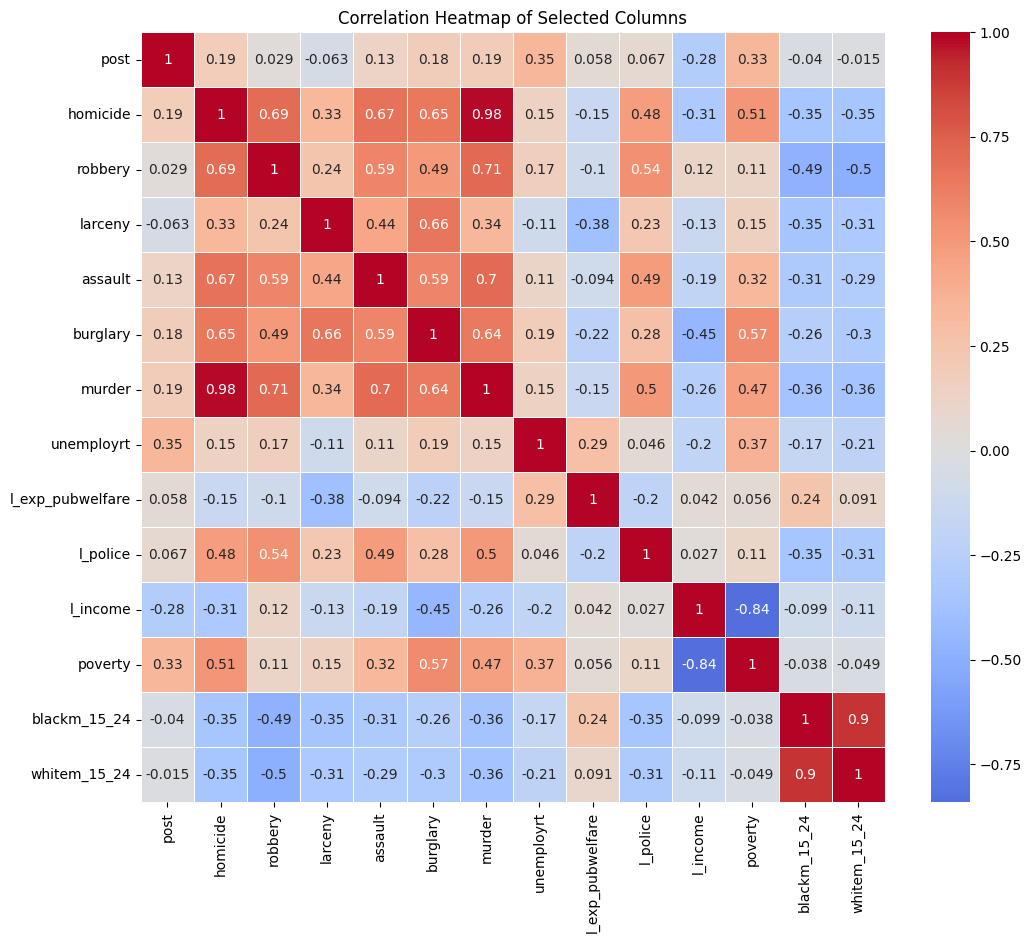

,post,homicide,robbery,larceny,assault,burglary,murder,unemployrt,l_exp_pubwelfare,l_police,l_income,poverty,blackm_15_24,whitem_15_24
post,1.000000,0.185552,0.029267,-0.063040,0.129711,0.175749,0.191282,0.345310,0.058224,0.067413,-0.276647,0.333237,-0.040467,-0.014876
homicide,0.185552,1.000000,0.694613,0.330594,0.670028,0.647939,0.979325,0.145866,-0.146701,0.482006,-0.309578,0.512363,-0.350559,-0.349906
robbery,0.029267,0.694613,1.000000,0.244628,0.591758,0.490359,0.714699,0.166702,-0.100850,0.544628,0.115448,0.110208,-0.487631,-0.502077
larceny,-0.063040,0.330594,0.244628,1.000000,0.435053,0.661896,0.339357,-0.105181,-0.384262,0.226406,-0.131244,0.152854,-0.353201,-0.311970
assault,0.129711,0.670028,0.591758,0.435053,1.000000,0.591112,0.703811,0.113650,-0.093857,0.488343,-0.192915,0.324891,-0.308058,-0.285674
burglary,0.175749,0.647939,0.490359,0.661896,0.591112,1.000000,0.641664,0.189737,-0.224795,0.280160,-0.445340,0.566790,-0.264899,-0.299360
murder,0.191282,0.979325,0.714699,0.339357,0.703811,0.641664,1.000000,0.147360,-0.146854,0.498882,-0.261969,0.465887,-0.361360,-0.360348
unemployrt,0.345310,0.145866,0.166702,-0.105181,0.113650,0.189737,0.147360,1.000000,0.286913,0.045501,-0.198532,0.369691,-0.166672,-0.210153
l_exp_pubwelfare,0.058224,-0.146701,-0.100850,-0.384262,-0.093857,-0.224795,-0.146854,0.286913,1.000000,-0.203697,0.042332,0.056429,0.241705,0.091445
l_police,0.067413,0.482006,0.544628,0.226406,0.488343,0.280160,0.498882,0.045501,-0.203697,1.000000,0.026721,0.107295,-0.346005,-0.306111


In [85]:
selected_columns = ['post', 'homicide', 'robbery', 'larceny', 
                    'assault', 'burglary', 'murder', 'unemployrt','l_exp_pubwelfare' ,'l_police','l_income',
                    'poverty', 'blackm_15_24', 'whitem_15_24']

df_selected = df[selected_columns]

corr_matrix = df_selected.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()
corr_matrix

<span style="color:yellow"> Answer: </span>
### Homicide & Murder:
    These two have a very strong positive correlation, which makes sense, since homicide is an umbrella term that includes murder. However,it is not necessarily causal. Instead, this reflects a definitional overlap between the two variables.

### Robbery & Assault:
    There is a moderate positive correlation, suggesting that areas with high robbery rates might also have high assault rates. This could be indirect causality, as both crimes are likely influenced by an underlying factor.

### Poverty & Unemployment Rate:
    There is a moderate positive correlation, which makes sense as poverty and unemployment are linked; unemployed induviduals are very likely to suffer from poverty. Thus, it can be inferred that there could most probably exist direct causality.

### Black Male 15-24 & White Male 15-24:
    There is a strong positive corellation beteween the two variables, which makes sense since the two share extremely similar trends in the correlation matrix. Howerver, they are not Causally realated since they are two completely different ethnic groups, subject to a host of differences, such as enviornment, treatment, bias etc.

### Poverty & Income:
    There is a strong negative correlation between the two, which makes sense, since an increase in income would lead to a decrease in poverty. Considering this, they can safely be inferred as causally related.

## **Analyzing the Impact of Castle Doctrine Laws on Homicide Rates**

We set out to analyze the impact of Castle Doctrine laws on homicide rates across different states in the United States. This investigation is particularly intriguing as it delves into the delicate balance between individual self-defense rights and broader public safety concerns. By examining whether the implementation of these laws correlates with changes in homicide rates, we aim to uncover insights that could inform policymakers and the community. However, we remain cautious, fully aware of the complexities involved in isolating the law's effect amidst a myriad of confounding factors. Despite these challenges, our analysis strives to navigate these intricacies to shed light on the implications of Castle Doctrine legislation.

**Question 2.1**:

Estimate the average treatment effect on **Homicide** before and after the doctrine was implemented using the **post** attribute in your dataset, without conditioning on any variable. Do you see any issues with this? Store your answe in the `ATE` variable

In [86]:
pre_law_homicide = df[df['post'] == 0]['homicide'].mean()
post_law_homicide = df[df['post'] == 1]['homicide'].mean()

ATE = post_law_homicide - pre_law_homicide

In [87]:
grader.check('test_q2_1')

test_q2_1 results: All test cases passed!

**Question 2.2:** In case we were to assume this approach to capture the true causal effect is valid, test whether the difference in homicide rates in the instances of states where the doctrine was adopted is significant at a 5% significane level?

a) Calculate the p-value for the treatment and store it in `p_value`. 

b) Comment on the statistical significance of your result. What does this p-value say about homicide rates and the impact of the castle doctrine based on our assumptions? Clearly state your null and alternative hypotheses. Should you reject the null hypothesis?

**Note:** 
- Since we don't have an equal number of instances for the treatment and control, you have to sample the **latest** 50 instances from each set.
- You need to use an independent samples t-test, where your test statistic is the difference in means of the two groups.
- You need to assume variances of the two populations are not equal.
- You can use scipy for this part.

You can refer to this for further guidance, if needed: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

In [88]:
from scipy import stats

pre_law_data = df[df['post'] == 0].tail(50)['homicide']
post_law_data = df[df['post'] == 1].tail(50)['homicide']

t_stat, p_value = stats.ttest_ind(pre_law_data, post_law_data, equal_var=False)

p_value

9.195806210348483e-08

In [89]:
grader.check('test_q2_2')

test_q2_2 results: All test cases passed!



<span style="color:yellow"> Answer: </span> Taking our Null Hypothesis to be that there is no significant difference in the homicide rates after the implementation of the Castle Doctrine, then, our Alternative Hypothesis would be that there is a significant difference in homicide rates after the implementation of the Castle Doctrine. Since our P-Value is extremely small, we can safely reject the Null Hypothesis.


**Question 3**:

a) Since our dataset comprises of data from many states, we aim to calculate the ATE across every state separately. 

-   Using only the states that eventually do implement the doctrine at some stage, 
-   Populate a **dataframe** containing the columns **sid**, **Pre_Treatment_Avg_Homicide**,**Post_Treatment_Avg_Homicide**, and **ATE_Homicide** to observe how the ATE for these states varies before and after they implement the doctrine. 
-   The dataframe must be sorted by the **sid**.
-   Store it in the `DF_CATE_STATE` variable 

b) Report the CATE. Store it in the `CATE` variable.

b) Do you observe any evidence for the **Simpson's Paradox** for any individual state? If so, why do you think this might be the case?

In [90]:
DF_CATE_STATE = pd.DataFrame(columns=['sid','Pre_Treatment_Avg_Homicide','Post_Treatment_Avg_Homicide','ATE_Homicide'])
states_with_post = df[df['post'] == 1]['sid'].unique()

ate_results = []

for state_id in states_with_post:
    state_data = df[df['sid'] == state_id]
    
    pre_treatment_avg = state_data[state_data['post'] == 0]['homicide'].mean()
    post_treatment_avg = state_data[state_data['post'] == 1]['homicide'].mean()
    ate_homicide = post_treatment_avg - pre_treatment_avg
    ate_results.append([state_id, pre_treatment_avg, post_treatment_avg, ate_homicide])

DF_CATE_STATE = pd.DataFrame(ate_results, columns=['sid', 'Pre_Treatment_Avg_Homicide', 'Post_Treatment_Avg_Homicide', 'ATE_Homicide'])
DF_CATE_STATE = DF_CATE_STATE.sort_values(by='sid')
CATE = DF_CATE_STATE['ATE_Homicide'].mean()
DF_CATE_STATE

,sid,Pre_Treatment_Avg_Homicide,Post_Treatment_Avg_Homicide,ATE_Homicide
0,1,7.461809,7.239657,-0.222152
1,2,5.490787,4.528263,-0.962524
2,3,7.665295,7.133347,-0.531949
3,10,5.506912,6.041792,0.534881
4,11,7.240239,6.608315,-0.631924
5,15,5.911693,5.035126,-0.876567
6,17,4.383397,4.012131,-0.371267
7,18,4.794723,4.652908,-0.141815
8,19,12.569534,12.583059,0.013525
9,23,6.716056,6.002740,-0.713317


<span style="color:yellow"> Answer: </span> State 10 is showing increased homicide rates post-treatment, leading to an positive ATE. The reason for this may be that the confounding variables are not controled for.


In [91]:
grader.check('test_q3a')

test_q3a results: All test cases passed!

In [92]:
grader.check('test_q3b')

test_q3b results: All test cases passed!

**Question 4**:

So far, we have assumed that the trends in a single state won't vary across time, which might be an issue. Since the Castle Doctrine only begins to be implemented across states after 2006, we can assume restrict to our analysis to the year 2005 for pre-implementation, and 2010, for post-implementation of the Castle Doctrine. Repeat the experiment performed in the last question, but by controlling for time.

**a)**
-   Basing your analysis only on states that have implemented the doctrine in 2010,
-   Find the ATE for those states in 2010 (i.e. post treatment group) and 2005 (i.e. pre treatment group),
-   Populate a **dataframe** containing the columns **sid**, **Pre_Treatment_Avg_Homicide**,**Post_Treatment_Avg_Homicide**, and **ATE_Homicide** ,
-   Sort your dataframe using the **sid** column
-   Store it in the variable `DF_CATE_YEAR_STATE`

**b)**  Report the CATE. Store it in the variable `CATE_Y`

**c)**  Do you believe this is now a true meaure of causal effect of the doctrine on homicide? State any considerable assumptions we might be making.


In [94]:
DF_CATE_STATE_YEAR = pd.DataFrame(columns=['sid', 'Pre_Treatment_Avg_Homicide', 'Post_Treatment_Avg_Homicide', 'ATE_Homicide'])

states_implemented_2010 = df[(df['post'] == 1) & (df['year'] == 2010)]['sid'].unique()

ate_year_results = []

for state_id in states_implemented_2010:
    state_data = df[df['sid'] == state_id]
    
    pre_treatment_avg = state_data[state_data['year'] == 2005]['homicide'].mean()
    post_treatment_avg = state_data[state_data['year'] == 2010]['homicide'].mean()
    
    ate_homicide = post_treatment_avg - pre_treatment_avg
    
    ate_year_results.append([state_id, pre_treatment_avg, post_treatment_avg, ate_homicide])

DF_CATE_YEAR_STATE = pd.DataFrame(ate_year_results, columns=['sid', 'Pre_Treatment_Avg_Homicide', 'Post_Treatment_Avg_Homicide', 'ATE_Homicide'])

DF_CATE_YEAR_STATE = DF_CATE_YEAR_STATE.sort_values(by='sid')

CATE_Y = DF_CATE_YEAR_STATE['ATE_Homicide'].mean()


In [95]:
grader.check('test_q4a')

test_q4a results:
    test_q4a - 1 result:
        ❌ Test case failed
        Trying:
            assert 'DF_CATE_STATE_YEAR' in globals(), "DF_CATE_STATE_YEAR is not defined."
        Expecting nothing
        ok
        Trying:
            mean_ate_year = DF_CATE_STATE_YEAR['ATE_Homicide'].mean()
        Expecting nothing
        ok
        Trying:
            std_ate_year = DF_CATE_STATE_YEAR['ATE_Homicide'].std()
        Expecting nothing
        ok
        Trying:
            expected_mean = -0.6419749809523808
        Expecting nothing
        ok
        Trying:
            expected_std = 0.877713316382941
        Expecting nothing
        ok
        Trying:
            tolerance = 1e-5
        Expecting nothing
        ok
        Trying:
            assert abs(mean_ate_year - expected_mean) <= tolerance, f"Mean ATE_Homicide {mean_ate_year} is not within the expected range."
        Expecting nothing
        **********************************************************************
        Line 13, in test_q4a 0
        Failed example:
            assert abs(mean_ate_year - expected_mean) <= tolerance, f"Mean ATE_Homicide {mean_ate_year} is not within the expected range."
        Exception raised:
            Traceback (most recent call last):
              File "c:\Program Files\Python312\Lib\doctest.py", line 1361, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest test_q4a 0[6]>", line 1, in <module>
                assert abs(mean_ate_year - expected_mean) <= tolerance, f"Mean ATE_Homicide {mean_ate_year} is not within the expected range."
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Mean ATE_Homicide nan is not within the expected range.
        Trying:
            assert abs(std_ate_year - expected_std) <= tolerance, f"STD ATE_Homicide {std_ate_year} is not within the expected range."
        Expecting nothing
        **********************************************************************
        Line 14, in test_q4a 0
        Failed example:
            assert abs(std_ate_year - expected_std) <= tolerance, f"STD ATE_Homicide {std_ate_year} is not within the expected range."
        Exception raised:
            Traceback (most recent call last):
              File "c:\Program Files\Python312\Lib\doctest.py", line 1361, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest test_q4a 0[7]>", line 1, in <module>
                assert abs(std_ate_year - expected_std) <= tolerance, f"STD ATE_Homicide {std_ate_year} is not within the expected range."
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: STD ATE_Homicide nan is not within the expected range.

In [96]:
grader.check('test_q4b')

test_q4b results: All test cases passed!

<span style="color:yellow"> Answer: </span>CATE-Y provides an estimate of the average treatment effect, but it may not fully reflect the true causal effect due to untested assumptions and potential confounding factors. The assumptions we make are that states implementing the doctrine in 2010 would have experienced similar trends in homicide rates to those that didn't. The Castle Doctrine in one state does not influence homicide rates in neighboring states.the Castle Doctrine in one state does not influence homicide rates in neighboring states. No other factors significantly impacted homicide rates during this period.

**Question 5**:

One of the fundamental Quasi-Experimental methods of measuring the ATE is the difference in difference approach. It allows us to effectively control for both:

1. **Time-Invariant Differences:** Any unobserved characteristics that do not change over time, such as cultural factors or baseline law enforcement practices.
2. **Common Temporal Trends:** Broader trends affecting all states, like economic shifts or national policy changes.


  Mathematically, the **Difference-in-Differences** estimator is expressed as:

  $DiD = (\overline{Y}_{\text{Post, Treated}} - \overline{Y}_{\text{Pre, Treated}}) - (\overline{Y}_{\text{Post, Control}} - \overline{Y}_{\text{Pre, Control}})$.


**a)** Plot an **overlaid line plot** of how the **mean of homicide rate** changes across time for states after and before implementing the doctrine. For reference to how your plot should look like, consult **plot.jpg** in your assignment folder.



**b)**  Report the ATE estimated using the DiD formula where:

-   Assume the pre-intervention period is 2005, while the post-intervention period is 2010,
-   Given **S** defines your set of all states, your treatment group **T** consists of the states that have implemented the doctrine in **2010**, and your control group are the states **S\T** in **2005** (i.e. the states apart from those incorporated in T)
-   Store your result in the `DiD_homicide` variable

**c)** Comment on the value of ATE obtained through DiD and the approach we used in the previous part. Which one do you believe is more robust to observing an association between homicide rates and the introdution of the Castle Doctrine?

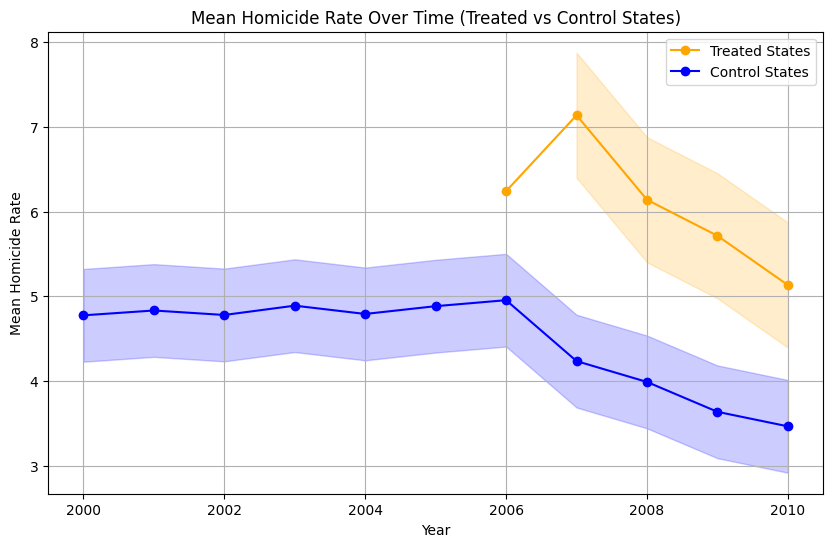

In [97]:

treated_states = df[df['post'] == 1]
control_states = df[df['post'] == 0]

treated_means = treated_states.groupby(['year'])['homicide'].mean().reset_index()
control_means = control_states.groupby(['year'])['homicide'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(treated_means['year'], treated_means['homicide'], label='Treated States', color='orange', marker='o')
plt.fill_between(treated_means['year'], 
                 treated_means['homicide'] - treated_means['homicide'].std(), 
                 treated_means['homicide'] + treated_means['homicide'].std(),
                 where=(treated_means['year'] >= 2007), color='orange', alpha=0.2)
plt.plot(control_means['year'], control_means['homicide'], label='Control States', color='blue', marker='o')
plt.fill_between(control_means['year'], 
                 control_means['homicide'] - control_means['homicide'].std(), 
                 control_means['homicide'] + control_means['homicide'].std(),
                 color='blue', alpha=0.2)
plt.title('Mean Homicide Rate Over Time (Treated vs Control States)')
plt.xlabel('Year')
plt.ylabel('Mean Homicide Rate')
plt.legend()
plt.grid(True)

plt.show()


In [98]:

pre_period = 2005
post_period = 2010

treated_states = df[df['post'] == 1]['sid'].unique()
control_states = df[~df['sid'].isin(treated_states)]['sid'].unique()

treated_pre = df[(df['year'] == pre_period) & (df['sid'].isin(treated_states))]['homicide'].mean()
treated_post = df[(df['year'] == post_period) & (df['sid'].isin(treated_states))]['homicide'].mean()

control_pre = df[(df['year'] == pre_period) & (df['sid'].isin(control_states))]['homicide'].mean()
control_post = df[(df['year'] == post_period) & (df['sid'].isin(control_states))]['homicide'].mean()

DiD_homicide = (treated_post - treated_pre) - (control_post - control_pre)
DiD_homicide

0.13131605353037656

In [99]:
grader.check('test_q5')

test_q5 results: All test cases passed!

<span style="color:yellow"> Answer: </span> THe answer for DiD is 0.131, which is a slight increase from last part. In my opinion, DiD is more robust as it accounts for time varying confounders, provides a clearer causal estimate by comparing treated states to control states over time, rather than just at the beginning and the end of the experiment.


**Question 6:**

We generally hypothesize that the implementation of Castle Doctrine laws would lead to a decrease in violent crime rates, as these laws are intended to deter criminal activity by empowering individuals to defend themselves. To test this expectation, calculate the **Difference-in-Differences (DiD)** estimates for the following crime categories:

- **Murder**
- **Robbery**
- **Larceny**
- **Assault**

Using the same DiD formula as previously defined, perform the calculations for each of these crime types to assess whether the implementation of Castle Doctrine laws is associated with a significant change in their respective rates.


**Instructions:**

a) **Report the DiD Estimates:**
-  For each of the following crime categories (murder, robbery, larceny, assault), compute the DiD estimate using the approach used for homicide. Store your results in `DiD_robbery`, `DiD_larceny`, `DiD_assault`, and `DiD_murder` variables.

b) **Interpret the Results:**
   - Analyze whether the DiD estimates indicate a decrease in crime rates consistent with our intuition, and briefly discuss any discrepancies. Would you suggest implementing the law?


In [100]:
DiD_murder = None
DiD_robbery = None
DiD_larceny = None
DiD_assault = None
pre_year = 2005
post_year = 2010

treated_states = df[(df['post'] == 1) & (df['year'] == post_year)]['sid'].unique()
control_states = df[~df['sid'].isin(treated_states)]['sid'].unique()
crime_types = ['murder', 'robbery', 'larceny', 'assault']
DiD_variables = ['DiD_murder', 'DiD_robbery', 'DiD_larceny', 'DiD_assault']

for crime, var_name in zip(crime_types, DiD_variables):
    pre_treated = df[(df['sid'].isin(treated_states)) & (df['year'] == pre_year)][crime].mean()
    pre_control = df[(df['sid'].isin(control_states)) & (df['year'] == pre_year)][crime].mean()

    post_treated = df[(df['sid'].isin(treated_states)) & (df['year'] == post_year)][crime].mean()
    post_control = df[(df['sid'].isin(control_states)) & (df['year'] == post_year)][crime].mean()

    globals()[var_name] = (post_treated - pre_treated) - (post_control - pre_control)

print(f"DiD Estimate for Murder: {DiD_murder}")
print(f"DiD Estimate for Robbery: {DiD_robbery}")
print(f"DiD Estimate for Larceny: {DiD_larceny}")
print(f"DiD Estimate for Assault: {DiD_assault}")


DiD Estimate for Murder: 0.15640436305418648
DiD Estimate for Robbery: -2.583372701149443
DiD Estimate for Larceny: -0.6787267651893671
DiD Estimate for Assault: -4.630575024630616


In [101]:
grader.check('test_q6')

test_q6 results: All test cases passed!

<span style="color:yellow"> Answer: </span> The DiD estimate for Murder shows a slight increase. The DiD of Robbery and Assault show a significant decrease, while the DiD of Larceny is showing a small decrease. This means that post introduction of the Doctrine, the rates of Robbery, Larceny and Assault decrease, however, the rates of MURders have gone up. The reason behind this could be due to discrepencies in data, for example, introduction of the Doctrine, could lead to emboldning criminals or more aggressive confrontations, leading to murder. Or, simply, incorrect data entry.
Overall, the doctrine seems to show a net positive benefit and I'd recommend implementing the law.


### **Lastly, just before we leave - let's test out another Quasi-Experimental Method of exploring causal relationships: *Multivariate Regression*!**

**Good News: Understanding that the workload at this stage of the semester is statistically significant, I’ve gone ahead and provided the code you’ll need to perform this regression 😊.**

Multivariate regression will help us understand whether the Castle Doctrine law truly impacts homicide rates, by isolating the effect of the law from several other covariates e.g. economic and policy influences.

### **Background**

In this model, we include **multiple control variables** such as economic indicators (e.g., unemployment rate, poverty rate) and policy-related factors (e.g., police presence in a state) to account for their potential influence on homicide rates. This allows us to **better isolate the causal impact** of the Castle Doctrine law. Here’s the general form of the regression model for this case based on literature:

**$\text{Outcome}_{it} = \beta_0 + \beta_1 \times \text{CDL}_{it} + \beta_2 \times X_{it} + \alpha_i + \lambda_t + \epsilon_{it}$**

where:
- $\text{Outcome}_{it}$: the crime outcome variable, in this case the homicide rate, for state $i$ at time $t$.
- $\text{CDL}_{it}$: the treatment variable, representing the Castle Doctrine law (set to 1 if the law is in effect in state $i$ during time $t$; 0 otherwise).
- $X_{it}$: a vector of control variables, such as unemployment rate, poverty rate, logged income, police presence, and welfare spending.
- $\alpha_i$: state fixed effects to control for differences across states that do not change over time.
- $\lambda_t$: year fixed effects to control for national trends that affect all states equally in each year.
- $\epsilon_{it}$: error term.

### **Objective**

By running this regression, we aim to isolate the effect of the Castle Doctrine law on homicide rates, holding all other factors constant. This approach is more robust than simpler comparisons, as it **controls for multiple potential confounding factors** and focuses on within-state changes over time, not just across states.

### **Question and Instructions**

1. **Run the Provided Code:** Execute the code provided to run this multivariate regression model on the dataset.

2. **Interpret the Results**: Based on the output:

    **a) Examine the coefficient for `post` (our treatment variable) to determine the effect of the Castle Doctrine law on homicide rates. How does it compare with our earlier estimate using the DiD approach?**   

    **b) Is the coefficient for `post` statistically significant at the 5% level? What does this tell you about the impact of the law on homicide rates?**

    **c) How do the control variables of unemployment rate, poverty, and police presence impact our outcome variable?**

    **d) Could there still be any limitations with the approach that we've used? **Hint**: Does the OLS model we are using for regression necessarily capture the underlying distribution?**

---

By completing this section, you'll gain insight into how multivariate regression helps isolate causal effects by controlling for multiple influences in a single model, giving you a deeper understanding of the policy's true impact on crime outcomes.



In [81]:
import statsmodels.formula.api as smf

# Our control variables 
control_vars = ['unemployrt', 'poverty', 'l_income', 'l_exp_pubwelfare', 'l_police']
controls = ' + '.join(control_vars)

# The OLS model we're using for regression. We use cluster standards error to better adjust for potential within-state correlations.
formula = f'homicide ~ post + {controls} + C(sid) + C(year)'
model = smf.ols(formula=formula, data=df).fit(cov_type='cluster', cov_kwds={'groups': df['sid']})

# Use this summary for your interpretations
display(model.summary())

C:\Users\razah\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 16
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               homicide   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     265.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.82e-42
Time:                        14:12:13   Log-Likelihood:                -533.33
No. Observations:                 550   AIC:                             1199.
Df Residuals:                     484   BIC:                             1483.
Df Model:                          65                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7559     13.270     -0.208      0.835     -28.765      23.253
C(sid)[T.2]         -2.8648      0.577     -4.961      0.000      -3.997      -1.733
C(sid)[T.3]         -0.0666      0.191     -0.348      0.728      -0.442       0.309
C(sid)[T.4]         -0.9296      0.197     -4.709      0.000      -1.317      -0.543
C(sid)[T.5]         -1.2519      0.372     -3.364      0.001      -1.981      -0.522
C(sid)[T.6]         -4.1867      0.530     -7.904      0.000      -5.225      -3.149
C(sid)[T.7]         -4.7908      0.597     -8.027      0.000      -5.961      -3.621
C(sid)[T.8]         -3.7973      0.451     -8.428      0.000      -4.680      -2.914
C(sid)[T.10]        -1.8572      0.299     -6.217      0.000      -2.443      -1.272
C(sid)[T.11]        -0.5133      0.208     -2.470      0.014      -0.921      -0.106
C(sid)[T.12]        -5.8375      0.516    -11.320      0.000      -6.848      -4.827
C(sid)[T.13]        -5.3651      0.293    -18.331      0.000      -5.939      -4.791
C(sid)[T.14]        -1.1022      0.379     -2.909      0.004      -1.845      -0.359
C(sid)[T.15]        -1.9371      0.348     -5.569      0.000      -2.619      -1.255
C(sid)[T.16]        -6.1190      0.405    -15.115      0.000      -6.912      -5.325
C(sid)[T.17]        -3.5177      0.398     -8.848      0.000      -4.297      -2.738
C(sid)[T.18]        -2.4976      0.271     -9.224      0.000      -3.028      -1.967
C(sid)[T.19]         5.2024      0.209     24.855      0.000       4.792       5.613
C(sid)[T.20]        -6.0877      0.457    -13.321      0.000      -6.983      -5.192
C(sid)[T.21]         0.9599      0.637      1.506      0.132      -0.289       2.209
C(sid)[T.22]        -5.3160      0.495    -10.738      0.000      -6.286      -4.346
C(sid)[T.23]        -0.9204      0.332     -2.769      0.006      -1.572      -0.269
C(sid)[T.24]        -5.7067      0.542    -10.531      0.000      -6.769      -4.645
C(sid)[T.25]         1.2338      0.402      3.066      0.002       0.445       2.022
C(sid)[T.26]        -1.0548      0.260     -4.064      0.000      -1.564      -0.546
C(sid)[T.27]        -4.4926      0.178    -25.198      0.000      -4.842      -4.143
C(sid)[T.28]        -4.7644      0.393    -12.138      0.000      -5.534      -3.995
C(sid)[T.29]         0.2027      0.613      0.331      0.741      -0.998       1.403
C(sid)[T.30]        -6.7903      0.703     -9.662      0.000      -8.168      -5.413
C(sid)[T.31]        -3.8306      0.658     -5.821      0.000      -5.121      -2.541
C(sid)[T.32]         0.4913      0.307      1.599      0.110      -0.111       1.093
C(sid)[T.33]        -3.2685      0.446     -7.333      0.000      -4.142      -2.395
C(sid)[T.34]        -1.0630      0.174     -6.102      0.000      -1.404      -0.722
C(sid)[T.35]        -6.

### a)
    The Coefficient of Post comes out to be positive for homicide rates, which means that with the implementation of the law, the homicide rates go up. Compared to the earlier estimated values, this is more precice and accurate.

### b)
    The coefficient of Post is NOT statistically significatn at 5%, this tells us that THe doctrine does NOT have a statistical impact on Homicide rates.

### c)
    The coeffecient of all three varaibles are significant. Coeffiecint for police is positive, which means that an increasted police number, leads to more homicides. The coefficient for poverty and unemployment rates, is negative and significant, which means a decrease in homicides, with increase in these two variables.

### d)
    There could be potentially omitted confounders, introducing bias. THEre couls also be measurement errors in numerical values. Lastly OLS assumes a linear relationship, if the true relationship is non-linear the model might misrepresent the effects.

### By now, all I hope is that you realize…

As you've worked through this assignment, I hope you've developed an appreciation for the complexities involved in establishing causality. Causal inference isn’t straightforward; it requires careful attention to assumptions, rigorous control of confounding factors, and a deep understanding of what the data can truly tell us. Each method we explored, from Difference-in-Differences to Multivariate Regression, required us to think critically about the limitations and nuances of our approach.

It's also important to note that the purpose of this dataset wasn’t to definitively justify or refute any policy’s effects. True causal analysis would require even deeper data exploration, consideration of additional factors, and careful external validation. What we've done here is just the beginning—a simplified view of a much more complex process.

As you approach real-world data problems, remember that establishing causality demands more than just statistical techniques. It requires a combination of domain knowledge, critical thinking, and a commitment to exploring and questioning the data from all angles. 

Congratulations on making it this far, and welcome to the world of careful, thoughtful data analysis! 🎉


# Fin